# Ada Boost Regressor

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler, robust_scale
from sqlalchemy import create_engine
from astropy.io import fits

In [9]:
%matplotlib inline
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "Spectral"

In [10]:
from ipywidgets import IntProgress
from IPython.display import display

In [11]:
SAMPDIR = "/mnt/arch/LAMOST/dr1/sample/"

In [12]:
X = np.load("POLLUX.npy");
y = np.load("pollux.npy")
Z = np.zeros_like(y)

In [13]:
%%time
n, f = y.shape
for i in range(f):
    ada = AdaBoostRegressor()
    ada.fit(X, y[:,i])
    ada.score(X, y[:,i])
    Z[:,i] = ada.predict(X)

CPU times: user 30min 29s, sys: 2.86 s, total: 30min 32s
Wall time: 30min 37s


In [14]:
E = np.sqrt(np.sum((Z-y)**2, axis=1))

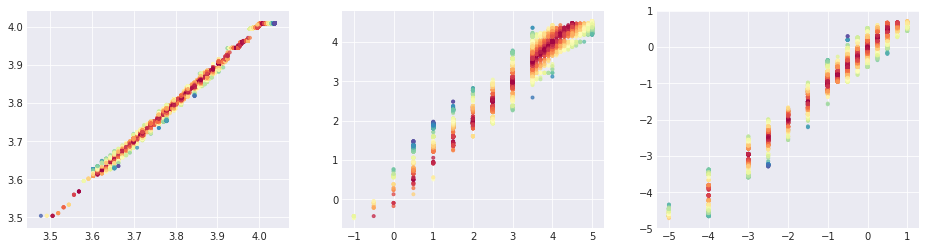

In [15]:
plt.figure(figsize=(16,4))
for i in range(f):
    plt.subplot(f"1{f}{1+i}")
    plt.scatter(y[:,i], Z[:,i],
                s=9, alpha=0.76,
                c=np.abs(Z[:,i]-y[:,i]))

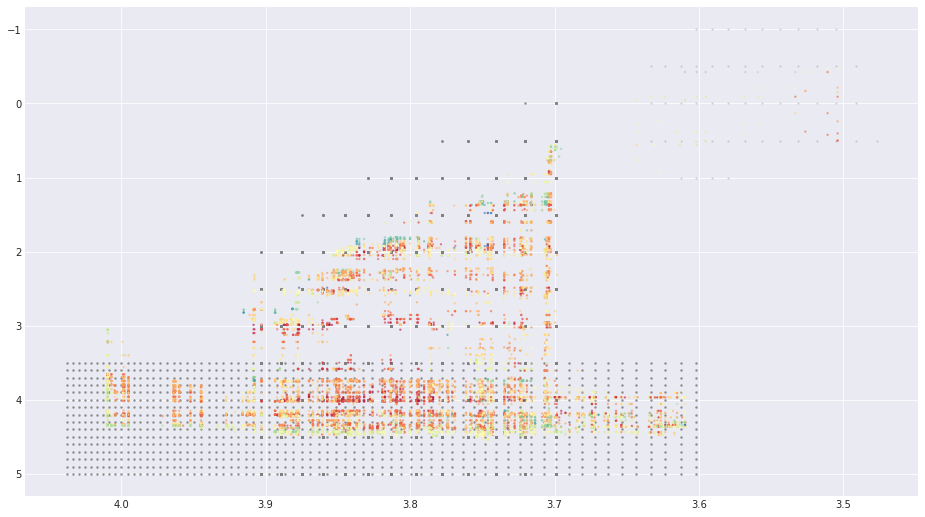

In [16]:
plt.gca().invert_xaxis(); plt.gca().invert_yaxis()
plt.scatter(y[:,0], y[:,1], s=2, c="gray", alpha=0.2)
plt.scatter(Z[:,0], Z[:,1], s=2, c=E, alpha=0.5)

In [ ]:
lamost = open("lamost.lst").readlines()
LAMOST = np.load("lamost.npy")
PREDIC = np.zeros_like(LAMOST)
#MINMAX = MinMaxScaler()#.fit(y)
#OUTFIT = MINMAX.fit_transform(LAMOST)
prog = IntProgress(min=0, max=len(lamost))
display(prog)
for i, lama in enumerate(lamost):
    lama = lama.strip()
    samp = SAMPDIR+lama+".fits"
    spec = fits.getdata(samp)[0]
    robo = robust_scale(spec)
    nume = 4096 - len(spec)
    full = np.append(robo, np.zeros(nume)).reshape(1,-1)
    PREDIC[i,:] = ada.predict(full)
    prog.value += 1
ERROR = np.sqrt(np.sum((LAMOST-PREDIC)**2, axis=1))

In [ ]:
plt.title("Colored uncertainty of functionality")
plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
plt.ylabel("Logaritmus of $g$")
plt.xticks([]); plt.yticks([])
#plt.colorbar()#.ax.set_ylabel("Fe/H");
plt.scatter(LAMOST[:,0], LAMOST[:,1], s=2, c="gray", alpha=0.2)
plt.scatter(PREDIC[:,0], PREDIC[:,1], s=2, c=ERROR, alpha=0.5)
plt.gca().invert_xaxis(); plt.gca().invert_yaxis();